<a href="https://colab.research.google.com/github/Antel0pe/VoronoiDiagrams/blob/main/Voronoi_Diagrams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [190]:
import matplotlib.pyplot as plt
import numpy as np

def plot_2d_points(point_groups=None, line_groups=None, title='2D Points', xlabel='X', ylabel='Y',                   point_group_colors=None, point_group_markers=None, point_group_sizes=None,
                   line_group_colors=None, line_group_styles=None,
                   grid=True, annotate=False, connect_points=False,
                   xTicks=None, yTicks=None):
    """
    Plot multiple groups of 2D points and line groups with customizable styles.

    Parameters:
    - point_groups: List of lists, where each inner list contains points as (x, y) tuples
    - line_groups: List of lists, where each inner list contains line tuples ((start_x, start_y), (end_x, end_y))
    - title: Title of the plot (default: '2D Points')
    - xlabel: Label for x-axis (default: 'X')
    - ylabel: Label for y-axis (default: 'Y')
    - point_group_colors: List of colors for point groups
    - point_group_markers: List of marker styles for point groups
    - point_group_sizes: List of point sizes for each group
    - line_group_colors: List of colors for line groups
    - line_group_styles: List of line styles for line groups
    - grid: Show grid lines (default: True)
    - annotate: Add point coordinates as text labels (default: False)
    - connect_points: Draw lines connecting the points in order (default: False)

    Returns:
    - matplotlib Figure and Axes objects for further customization
    """
    # Create the plot
    plt.figure(figsize=(6, 6))

    # Default color and marker cycles
    default_colors = plt.cm.Set1.colors
    default_markers = ['o', '^', 's', 'p', '*', '+', 'x', 'D']
    default_line_styles = ['-', '--', '-.', ':']

    # Plot point groups if provided
    if point_groups is not None:
        # Ensure we have enough colors, markers, and sizes
        point_group_colors = point_group_colors or [default_colors[i % len(default_colors)] for i in range(len(point_groups))]
        point_group_markers = point_group_markers or [default_markers[i % len(default_markers)] for i in range(len(point_groups))]
        point_group_sizes = point_group_sizes or [50] * len(point_groups)

        # Plot each group of points
        for group_idx, point_group in enumerate(point_groups):
            points_array = np.array(point_group)

            plt.scatter(points_array[:, 0], points_array[:, 1],
                        color=point_group_colors[group_idx],
                        marker=point_group_markers[group_idx],
                        s=point_group_sizes[group_idx])

            # Optionally annotate points
            if annotate:
                for (x, y) in point_group:
                    plt.annotate(f'({x}, {y})', (x, y),
                                 xytext=(5, 5), textcoords='offset points')

            # Optionally connect points within the group
            if connect_points:
                plt.plot(points_array[:, 0], points_array[:, 1],
                         color=point_group_colors[group_idx],
                         linestyle='--',
                         alpha=0.5)

    # Plot line groups if provided
    if line_groups is not None:
        # Ensure we have enough colors and styles
        line_group_colors = line_group_colors or [default_colors[i % len(default_colors)] for i in range(len(line_groups))]
        line_group_styles = line_group_styles or [default_line_styles[i % len(default_line_styles)] for i in range(len(line_groups))]

        # Plot each group of lines
        for group_idx, line_group in enumerate(line_groups):
            color = line_group_colors[group_idx]
            line_style = line_group_styles[group_idx]

            for line in line_group:
                # Unpack start and end points
                (x1, y1), (x2, y2) = line
                plt.plot([x1, x2], [y1, y2],
                         color=color,
                         linestyle=line_style,
                         alpha=0.7)

    # Customize plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    if xTicks is not None:
        plt.xticks(xTicks)

    if yTicks is not None:
        plt.yticks(yTicks)

    # Add grid if requested
    if grid:
        plt.grid(True, linestyle='--', linewidth=0.5)

    # Adjust layout
    plt.tight_layout()

    return plt.gcf(), plt.gca()

# Example usage
def example_usage():
    # Sample point groups
    point_groups = [
        [(1, 2), (3, 4), (5, 1)],  # First group
        [(2, 6), (4, 3)]            # Second group
    ]

    # Sample line groups
    line_groups = [
        [((1, 2), (3, 4)), ((1, 2), (5, 1)), ((1, 2), (2, 6)),
         ((1, 2), (4, 3)), ((3, 4), (5, 1)), ((3, 4), (2, 6)),
         ((3, 4), (4, 3)), ((5, 1), (2, 6)), ((5, 1), (4, 3)),
         ((2, 6), (4, 3))],
        [((1, 2), (3, 4))]
    ]

    # Plot with point and line groups
    plot_2d_points(point_groups=point_groups,
                   line_groups=line_groups,
                   title='Points and Lines with Multiple Groups',
                   annotate=True,
                   point_group_colors=['red', 'blue'],
                   point_group_markers=['^', 'o'],
                   point_group_sizes=[100, 50],
                   line_group_colors=['green', 'purple'],
                   line_group_styles=['-', '--'])
    plt.show()

# Uncomment to run example
# example_usage()

In [191]:
points = [(1, 2), (3, 4), (5, 1), (2, 6), (4, 3)]
pointGroups = [points]
pointGroupColors = ['red']

lineGroups = []
lineGroupColors = []

In [192]:
# Line to every other vertex
lineToEveryVertex = []
for i in range(len(points)):
    for j in range(i + 1, len(points)):
        lineToEveryVertex.append((points[i], points[j]))

# lineGroups.append(lineToEveryVertex)
# lineGroupColors.append('blue')

In [193]:
# Split line segment in half
midPoints = []
for i in lineToEveryVertex:
    (x1, y1), (x2, y2) = i
    mid_x = (x1 + x2) / 2
    mid_y = (y1 + y2) / 2
    midPoints.append((mid_x, mid_y))

# pointGroups.append(midPoints)
# pointGroupColors.append('green')

In [194]:
# find center of triangles
linesToCenterOfTriangles = []
for i in range(0, len(midPoints)):
    for j in range(i + 1, len(midPoints)):
        linesToCenterOfTriangles.append((midPoints[j], midPoints[i]))

# lineGroups.append(linesToCenterOfTriangles)
# lineGroupColors.append('yellow')

In [195]:
# centroid of triangles

import itertools

centroidPoints = []
threeCombos = list(itertools.combinations(points, 3))

for ((x1, y1), (x2, y2), (x3, y3)) in threeCombos:
    centroid_x = (x1 + x2 + x3) / 3
    centroid_y = (y1 + y2 + y3) / 3
    centroidPoints.append((centroid_x, centroid_y))

# pointGroups.append(centroidPoints)
# pointGroupColors.append('brown')

In [196]:
# draw a line through the medians and centroids
import itertools

linesFromMidpointToCentroid = []
threeCombos = list(itertools.combinations(points, 3))

for ((x1, y1), (x2, y2), (x3, y3)) in threeCombos:
    centroid_x = (x1 + x2 + x3) / 3
    centroid_y = (y1 + y2 + y3) / 3
    linesFromMidpointToCentroid.append((((x1 + x2) / 2, (y1 + y2) / 2), (centroid_x, centroid_y)))
    linesFromMidpointToCentroid.append((((x1 + x3) / 2, (y1 + y3) / 2), (centroid_x, centroid_y)))
    linesFromMidpointToCentroid.append((((x2 + x3) / 2, (y2 + y3) / 2), (centroid_x, centroid_y)))

# lineGroups.append(linesFromMidpointToCentroid)
# lineGroupColors.append('orange')

In [197]:
# connect all the midpoints
linesToFromMidpoints = []
for i in range(len(midPoints)):
    for j in range(i + 1, len(midPoints)):
        linesToFromMidpoints.append((midPoints[i], midPoints[j]))

# lineGroups.append(linesToFromMidpoints)
# lineGroupColors.append('purple')

In [198]:
# find perpendicular line to vertex-vertex connection
import itertools

allPairsOfPoints = list(itertools.combinations(points, 2))
perpendicularLines = []

for (x1, y1), (x2, y2) in allPairsOfPoints:
    # find median point
    midPointX = (x1+x2)/2
    midPointY = (y1+y2)/2

    # calculate perpendicular line
    slopeOfLine = (y2-y1)/(x2-x1)
    perpendicularSlope = -1/slopeOfLine

    perpendicularLineX1 = midPointX+0.5
    perpendicularLineY1 = perpendicularSlope * (perpendicularLineX1 - midPointX) + midPointY
    perpendicularLineX2 = midPointX-0.5
    perpendicularLineY2 = perpendicularSlope * (perpendicularLineX2 - midPointX) + midPointY

    perpendicularLines.append(((perpendicularLineX1, perpendicularLineY1), (perpendicularLineX2, perpendicularLineY2)))

# lineGroups.append(perpendicularLines)
# lineGroupColors.append('purple')

In [199]:
pointX, pointY = (1, 2)

def findPerpendicularLineEquation(x1, y1, x2, y2):
    midPointX = (x1+x2)/2
    midPointY = (y1+y2)/2

    slopeOfLine = (y2-y1)/(x2-x1)
    perpendicularSlope = -1/slopeOfLine

    def equation(x):
        return perpendicularSlope * (x - midPointX) + midPointY

    return equation

lineEquations = []

for (x1, y1) in points:
    if x1 == pointX and y1 == pointY:
        continue

    lineEquations.append(findPerpendicularLineEquation(pointX, pointY, x1, y1))


'''
look through lines clockwise. figure out where the midpoint of a line intersects with the next clockwise line.
'''

'\nlook through lines clockwise. figure out where the midpoint of a line intersects with the next clockwise line.\n'

In [200]:
import itertools
import math

allTriplesOfPoints = list(itertools.combinations(points, 3))
centerOfCirclePoints = []
circleOf3PointsLines = []
pointsToCenterOfCircle = []
midPointsToCenterOfCircle = []
delauneyTriangleLines = []
lineExtendedFromMedianPastCircumcenter = []

def extend_bisector_line(midpoint, circumcenter, extent=10):
    """
    Extend the line from midpoint through circumcenter to the other side

    :param midpoint: Midpoint of triangle side
    :param circumcenter: Center of circumscribed circle
    :param extent: Distance to extend beyond circumcenter
    :return: Point on the extended line
    """
    # Vector from midpoint to circumcenter
    dx = circumcenter[0] - midpoint[0]
    dy = circumcenter[1] - midpoint[1]

    # Extend beyond circumcenter in the same direction
    extended_x = circumcenter[0] + dx
    extended_y = circumcenter[1] + dy

    return (extended_x, extended_y)

for (x1, y1), (x2, y2), (x3, y3) in allTriplesOfPoints:
    # Intermediate calculations
    a = x1 * (y2 - y3) - y1 * (x2 - x3) + x2 * y3 - x3 * y2
    bx = ((x1*x1 + y1*y1) * (y2 - y3) + (x2*x2 + y2*y2) * (y3 - y1) + (x3*x3 + y3*y3) * (y1 - y2))
    by = ((x1*x1 + y1*y1) * (x3 - x2) + (x2*x2 + y2*y2) * (x1 - x3) + (x3*x3 + y3*y3) * (x2 - x1))

    # Circle center coordinates
    center_x = bx / (2 * a)
    center_y = by / (2 * a)

    # Radius calculation
    radius = math.sqrt(
        ((x1 - center_x)**2 + (y1 - center_y)**2)
    )

    # if center_x < 0 or center_x > 10 or center_y < 0 or center_y > 10:
    #     continue


    # can use closest point alg here? if closest point distance is greater than radius then no point exists in circle
    anyPointsInCircle = False
    for p in points:
        distance = math.sqrt((p[0] - center_x)**2 + (p[1] - center_y)**2)
        if distance < radius:
            anyPointsInCircle = True
            break

    if not anyPointsInCircle:
        centerOfCirclePoints.append(((center_x, center_y)))
        circleOf3PointsLines.append(((center_x, center_y+radius), (center_x+radius, center_y)))
        circleOf3PointsLines.append(((center_x+radius, center_y), (center_x, center_y-radius)))
        circleOf3PointsLines.append(((center_x, center_y-radius), (center_x-radius, center_y)))
        circleOf3PointsLines.append(((center_x-radius, center_y), (center_x, center_y+radius)))

        pointsToCenterOfCircle.append(((x1, y1), (center_x, center_y)))
        pointsToCenterOfCircle.append(((x2, y2), (center_x, center_y)))
        pointsToCenterOfCircle.append(((x3, y3), (center_x, center_y)))

        midPointsToCenterOfCircle.append((((x1+x2)/2, (y1+y2)/2), (center_x, center_y)))
        midPointsToCenterOfCircle.append((((x2+x3)/2, (y2+y3)/2), (center_x, center_y)))
        midPointsToCenterOfCircle.append((((x1+x3)/2, (y1+y3)/2), (center_x, center_y)))

        delauneyTriangleLines.append(((x1, y1), (x2, y2)))
        delauneyTriangleLines.append(((x1, y1), (x3, y3)))
        delauneyTriangleLines.append(((x2, y2), (x3, y3)))

        lineExtendedFromMedianPastCircumcenter.append((((x1+x2)/2, (y1+y2)/2), extend_bisector_line(((x1+x2)/2, (y1+y2)/2), (center_x, center_y))))
        lineExtendedFromMedianPastCircumcenter.append((((x1+x3)/2, (y1+y3)/2), extend_bisector_line(((x1+x3)/2, (y1+y3)/2), (center_x, center_y))))
        lineExtendedFromMedianPastCircumcenter.append((((x2+x3)/2, (y2+y3)/2), extend_bisector_line(((x2+x3)/2, (y2+y3)/2), (center_x, center_y))))

lineGroups.append(circleOf3PointsLines)
lineGroupColors.append('orange')

# lineGroups.append(pointsToCenterOfCircle)
# lineGroupColors.append('purple')

lineGroups.append(delauneyTriangleLines)
lineGroupColors.append('brown')

lineGroups.append(lineExtendedFromMedianPastCircumcenter)
print(lineExtendedFromMedianPastCircumcenter)
lineGroupColors.append('green')

# lineGroups.append(midPointsToCenterOfCircle)
# lineGroupColors.append('green')

pointGroups.append(centerOfCirclePoints)
pointGroupColors.append('black')

[((2.0, 3.0), (3.0, 2.0)), ((2.5, 2.5), (2.5, 2.5)), ((3.5, 3.5), (1.5, 1.5)), ((3.0, 1.5), (2.8571428571428568, 0.9285714285714284)), ((2.5, 2.5), (3.3571428571428568, -0.07142857142857162)), ((4.5, 2.0), (1.3571428571428568, 0.4285714285714284)), ((2.5, 5.0), (12.5, 10.0)), ((3.5, 3.5), (11.5, 11.5)), ((3.0, 4.5), (12.0, 10.5))]


(<Figure size 600x600 with 1 Axes>,
 <Axes: title={'center': '2D Points'}, xlabel='X', ylabel='Y'>)

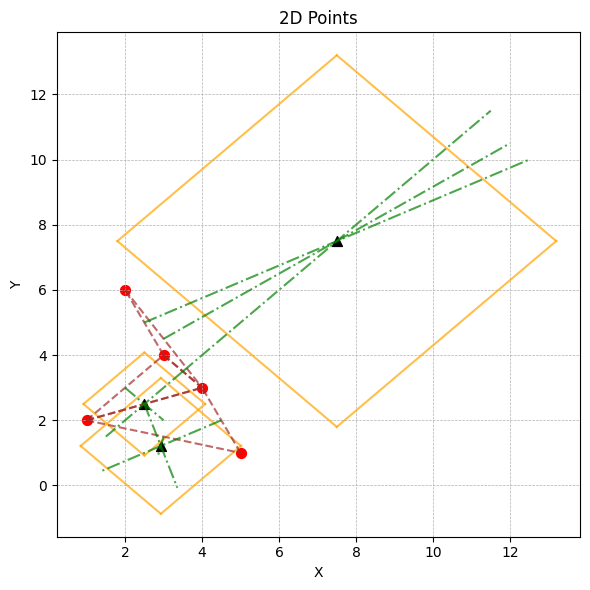

In [201]:
if len(pointGroups) != len(pointGroupColors):
    print(f'Points Groups Length: {len(pointGroups)}')
    print(f'Point Group Colors Length: {len(pointGroupColors)}')

if len(lineGroups) != len(lineGroupColors):
    print(f'Line Groups Length: {len(lineGroups)}')
    print(f'Line Group Colors Length: {len(lineGroupColors)}')

plot_2d_points(point_groups=pointGroups, point_group_colors=pointGroupColors,
               line_groups=lineGroups, line_group_colors=lineGroupColors,
               )

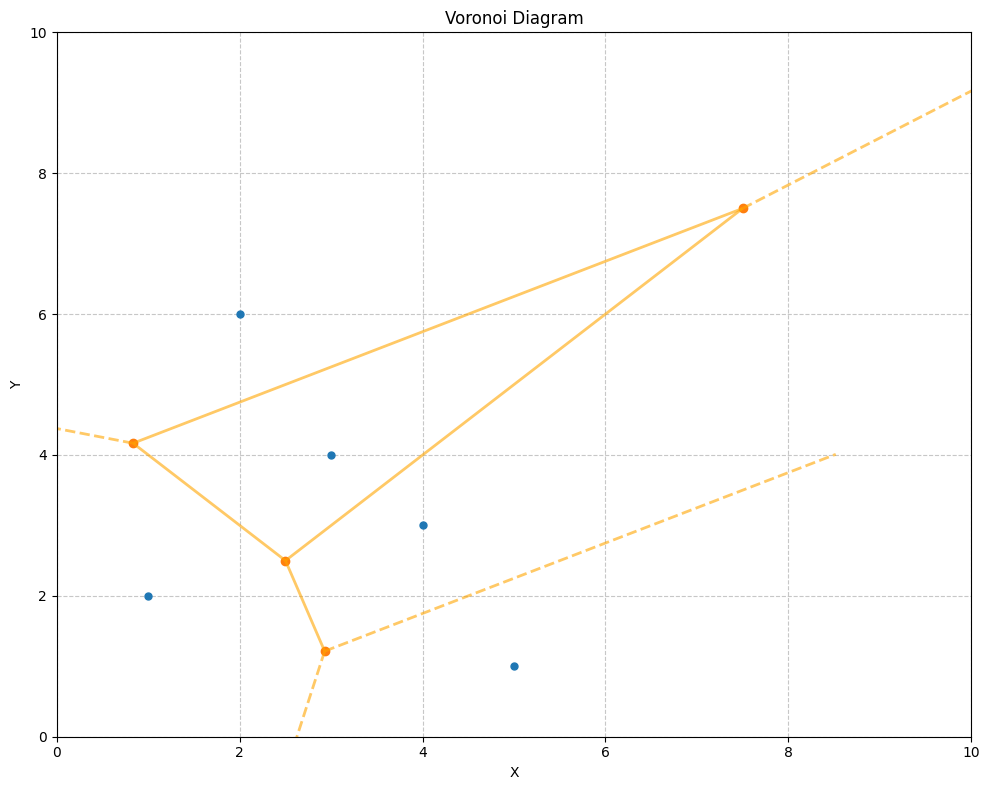

In [202]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d

def voronoi_diagram(points):
    # Create Voronoi diagram
    vor = Voronoi(points)

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 8))  # Larger figure size
    voronoi_plot_2d(vor, ax=ax, show_vertices=True, line_colors='orange', line_width=2, line_alpha=0.6, point_size=10)

    # Optional: Add some padding around the points
    x_coords = [p[0] for p in points]
    y_coords = [p[1] for p in points]

    x_min, x_max = min(x_coords), max(x_coords)
    y_min, y_max = min(y_coords), max(y_coords)

    # Add 20% padding
    x_padding = (x_max - x_min) * 0.2
    y_padding = (y_max - y_min) * 0.2

    plt.xlim(0, 10)
    plt.ylim(0, 10)

    # Add title and labels
    plt.title('Voronoi Diagram')
    plt.xlabel('X')
    plt.ylabel('Y')

    # Add grid for better visibility
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

# Use the function with your points
voronoi_diagram(points)